## Bifurcation diagrams for consensus on complete networks


Franci, A., & Nov, O. C. (n.d.). A Realization Theory for Bio-inspired Collective Decision-Making. Retrieved from https://arxiv.org/pdf/1503.08526v3.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
import pylab

#### Network dynamics

- Pitchfork bifurcation

$\dot{\mathbf{x}} = -Dx + A\cdot S_p(\mathbf{x};u)$

$S_p(x;u) = u\cdot tanh(x)$

- Saddle-Node

$\dot{\mathbf{x}} = -Dx + A\cdot S_{sn}(\mathbf{x};u)$

$S_{sn}(x;u) = ue^{(x+1)} - 1$

- Transcritical

$\dot{\mathbf{x}} = -Dx + A\cdot S_t(\mathbf{x};u)$

$S_t(x;u) = x^2 + ux$

### Complete network

$d_{ii} = N-1$

In [2]:
g = nx.complete_graph(10, create_using=nx.DiGraph())

In [3]:
#color_map = []
for i, n in g.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0]-1

In [4]:
g.nodes(data = True)

NodeDataView({0: {'decision': 0.9397339656291808}, 1: {'decision': 0.5044495045316395}, 2: {'decision': 0.4299458325939287}, 3: {'decision': 0.19440106758413234}, 4: {'decision': -0.818641100125999}, 5: {'decision': -0.6593239398732464}, 6: {'decision': 0.2631201257538369}, 7: {'decision': 0.6773708716245068}, 8: {'decision': 0.858040461806636}, 9: {'decision': 0.15769569943958217}})

In [5]:
[n['decision'] for i, n in g.nodes(data = True)]

[0.9397339656291808,
 0.5044495045316395,
 0.4299458325939287,
 0.19440106758413234,
 -0.818641100125999,
 -0.6593239398732464,
 0.2631201257538369,
 0.6773708716245068,
 0.858040461806636,
 0.15769569943958217]

In [6]:
A = nx.adjacency_matrix(g)
D = np.diag(np.asarray(np.sum(nx.adjacency_matrix(g), axis=1)).reshape(-1))

In [7]:
-D+A

matrix([[-9,  1,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 1, -9,  1,  1,  1,  1,  1,  1,  1,  1],
        [ 1,  1, -9,  1,  1,  1,  1,  1,  1,  1],
        [ 1,  1,  1, -9,  1,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1, -9,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1, -9,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1, -9,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1, -9,  1,  1],
        [ 1,  1,  1,  1,  1,  1,  1,  1, -9,  1],
        [ 1,  1,  1,  1,  1,  1,  1,  1,  1, -9]])

### Pitchfork

In [8]:
dt = 0.01
u_range = np.arange(0.7, 1.5, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_p = np.zeros((np.size(u_range), N))
x_n = np.zeros((np.size(u_range), N))

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + u*A.dot(np.tanh(x))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=np.random.rand(N))
    x_p[i] = res.y[:,np.shape(res.y)[1]-1]

for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_p = lambda t,x: -D.dot(x) + u*A.dot(np.tanh(x))
    res = solve_ivp(fun=f_p, t_span=[0,30], y0=-np.random.rand(N))
    x_n[i] = res.y[:,np.shape(res.y)[1]-1]

In [9]:
#u_range_unstable = np.arange(1+dt, 1.5, dt)
#x_un = np.zeros((np.size(u_range_unstable), N))
#for i in np.arange(0,np.size(u_range_unstable)):
#    u = u_range_unstable[i]
#    f_p = lambda t,x: -D.dot(x) - u*A.dot(np.tanh(x))
#    res = solve_ivp(fun=f_p, t_span=[0,30], y0=np.random.rand(N))
#    x_un[i] = res.y[:,np.shape(res.y)[1]-1]

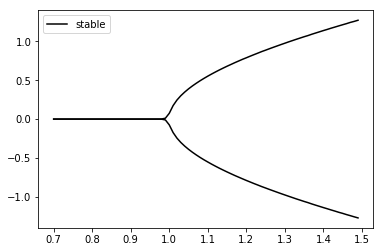

In [10]:
plt.plot(u_range, x_p[:,0], color="black")
plt.plot(u_range, x_n[:,0], label="stable", color="black")
#plt.plot(u_range_unstable, x_un[:,0], label="unstable", linestyle='--', color="black")
plt.legend()
plt.show()

### Transcritical

In [11]:
dt = 0.01
u_range = np.arange(0.7, 1.5, dt)
n_iter = 1000
N = nx.number_of_nodes(g)
x_n = np.zeros((np.size(u_range), N))


# forward time to get to stable fixed points
for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_t = lambda t,x:-D.dot(x) + A.dot(np.square(x) + u*x)
    res = solve_ivp(fun=f_t, t_span=[0,30], y0=-np.random.rand(10))
    x_p[i] = res.y[:,np.shape(res.y)[1]-1]

In [12]:
x_n = np.zeros((np.size(u_range), N))
# invert stability to get to unstable fixed points
for i in np.arange(0,np.size(u_range)):
    u = u_range[i]
    f_t = lambda t,x:-D.dot(x) + A.dot(-np.square(x-2+u) - (2-u)*(x-2+u))
    res = solve_ivp(fun=f_t, t_span=[0,30], y0=np.random.rand(10))
    x_n[i] = res.y[:,np.shape(res.y)[1]-1]

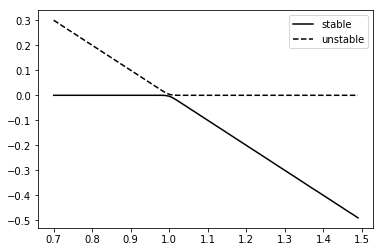

In [13]:
plt.plot(u_range, x_p[:,0], label="stable", color="black")
plt.plot(u_range, x_n[:,0], label="unstable", color="black", linestyle='--')
plt.legend()
plt.show()

In [14]:
u = 0.8
f_t = lambda t,x:-D.dot(x) + A.dot(np.square(x-1.2) + u*(x-1.2))
res = solve_ivp(fun=f_t, t_span=[0,30], y0=np.repeat(0.2,10))
#res = solve_ivp(fun=f_t, t_span=[0,30], y0=np.random.rand(N))

In [15]:
res.y[:,np.shape(res.y)[1]-1]

array([0.2000234, 0.2000234, 0.2000234, 0.2000234, 0.2000234, 0.2000234,
       0.2000234, 0.2000234, 0.2000234, 0.2000234])

In [16]:
u = -0.9
f_t_1d = lambda t,x: u*x - x*x
sol = solve_ivp(f_t_1d, [0,10], np.array([-0.89]))


In [17]:
sol.y[:,np.shape(sol.y)[1]-1]

array([-0.00979447])

#### Saddle-node

In [18]:
u_range = np.linspace(start=0.2, stop=np.exp(-1)-0.001, num=20)
x_s = np.zeros((np.size(u_range), N))

# stable
for i in np.arange(0, np.size(u_range)):
    u = u_range[i]
    f_sn = lambda t,x: -D.dot(x) + A.dot(u*np.exp(x+1) - 1)
    res = solve_ivp(fun=f_sn, t_span=[0,30], y0=np.random.rand(N)/10)
    x_s[i] = res.y[:,np.shape(res.y)[1]-1]

In [19]:
x_us = np.zeros((np.size(u_range), N))
# unstable
for i in np.arange(0, np.size(u_range)):
    u = u_range[i]
    f_sn = lambda t,x: -D.dot(x) + A.dot(np.log((x+1)/u) - 1)
    res = solve_ivp(fun=f_sn, t_span=[0,30], y0=np.random.rand(N)/10)
    x_us[i] = res.y[:,np.shape(res.y)[1]-1]

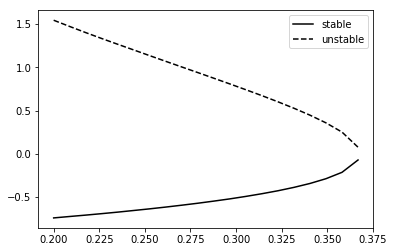

In [20]:
plt.plot(u_range, x_s[:,0], color="black", label="stable")
plt.plot(u_range, x_us[:,0], color="black", linestyle='--', label="unstable")
plt.legend()
plt.show()